<h1>
<center>Navid Bahadoran</center>
</h1>
<h1>
<center>Homework 10, due November 17th, 11:59pm</center>
</h1>

<h2>
<center>Nov 9, 2023</center>
</h2>
In this homework, you are required to include in your report the code that you
implemented. If you use some code from the web or package, also mention in your
report the origin of the code.<br>
1. The data data_clust is a Matlab file containing 13000 observations $x_{i} \in R^{640}$
and their labels $y_{i}$. The data can be loaded in Python using scipy.io.loadmat and
there is a similar package to load the data into R. We will perform k-means clustering
using different initialization methods and evaluate the clustering result.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix, adjusted_rand_score
from scipy.optimize import linear_sum_assignment
from scipy.io import loadmat
from IPython.display import Markdown, display
import pandas as pd

**a) Perform PCA on the data matrix X and plot the projected points on the first two
PCs. Use a different color for each class. (1 point)**

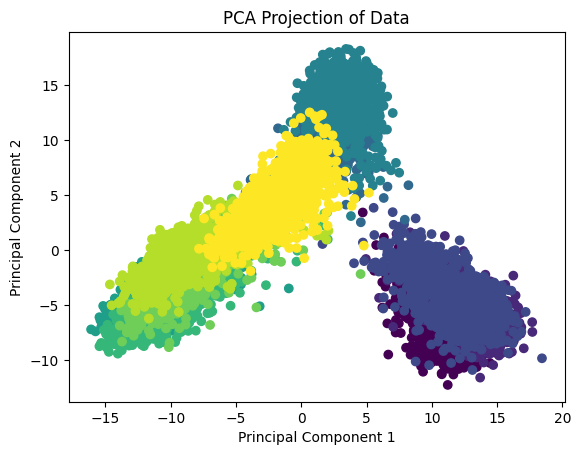

In [2]:


# a) Perform PCA and plot projected points
data = loadmat(r'D:\Pycharm\Courses\STA5635\HW10\data_clust.mat')
X = data['x']
y = data['y'].ravel()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA Projection of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**b) Perform k-means clustering using one random initialization. Compute the 10 ×
10 contingency matrix, which is a 2D histogram of the $(yi, \hat{yi})$ combinations. See
sklearn.metrics.cluster.contingency_matrix for details. Display
the obtained contingency matrix as a grayscale image. (1 point)**

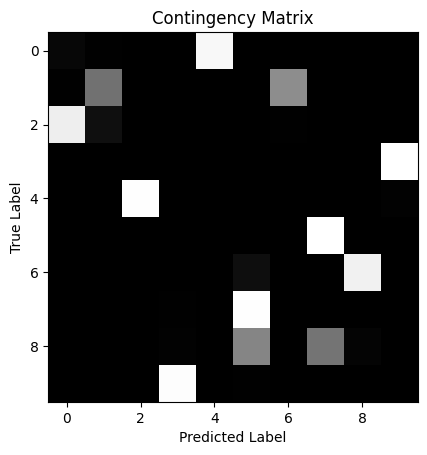

In [3]:
# np.unique(y) is 0,1,...,9 which gives 10 by 10 contigency matrix
kmeans = KMeans(n_clusters=len(np.unique(y)), random_state=42,init='random',n_init=1)
y_pred = kmeans.fit_predict(X)

cont_matrix = contingency_matrix(y, y_pred)
plt.imshow(cont_matrix, cmap='gray', interpolation='none')
plt.title('Contingency Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**c) The clustering result is the same up to a permutation of the labels. We will
assign the cluster labels to the true labels by finding a permutation of the labels
that maximizes the sum of the diagonal elements on the resulting contingency
matrix. For that we will solve the linear sum assignment problem, see
scipy.optimize.linear_sum_assignment for details. Use the contingency
matrix to solve the linear sum assignment, but be aware that the linear
sum assignment performs a minimization, but we want to maximize the assignment
of clusters to labels. Display the contingency matrix obtained after the
permutation of the labels given by the linear sum assignment, which should be
close to a diagonal matrix. (1 point)**

Here's a step-by-step explanation:<br>

1-Compute Contingency Matrix (cont_matrix):<br>
- In part b), you obtained a contingency matrix, which is a 2D histogram of the (true_label, predicted_label) combinations. This matrix is denoted as cont_matrix<br>

2-Linear Sum Assignment Problem (linear_sum_assignment):<br>
- The linear sum assignment problem aims to find the optimal assignment of rows to columns in a cost matrix. In this case, we want to maximize the sum of the diagonal elements in the contingency matrix.<br>

3-Permutation (row_ind, col_ind):<br>
- The linear_sum_assignment function returns two arrays, row_ind and col_ind, representing the indices of the optimal assignment. In this context, row_ind corresponds to the true labels, and col_ind corresponds to the predicted labels.<br>

4-Permute Contingency Matrix (cont_matrix_permuted):<br>
- Use the obtained indices (row_ind and col_ind) to permute the columns of the contingency matrix. This results in a new contingency matrix, cont_matrix_permuted, where the diagonal elements are maximized.

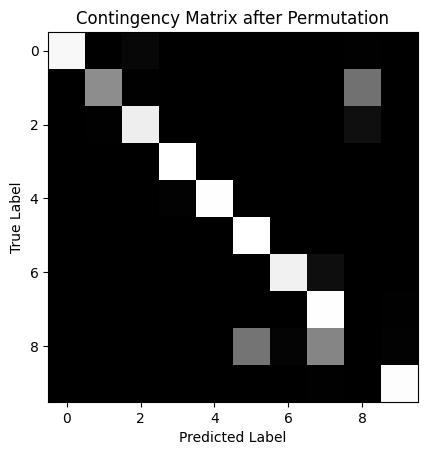

In [4]:
# c) Solve the linear sum assignment problem
row_ind, col_ind = linear_sum_assignment(cont_matrix,maximize=True)
cont_matrix_permuted = cont_matrix[:, col_ind]
plt.imshow(cont_matrix_permuted, cmap='gray', interpolation='none')
plt.title('Contingency Matrix after Permutation')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**d) Repeat points b) and c) five times with different random initializations and display
the 5 obtained original and permuted contingency matrices. In each case
report the accuracy score, which is the sum of the diagonal elements of the permuted
contingency matrix divided by the number of observations. Also report
the obtained Adjusted Rand Index (sklearn.metrics.adjusted_rand_score)
in each case, which should be pretty close to the accuracy. (2 points)**

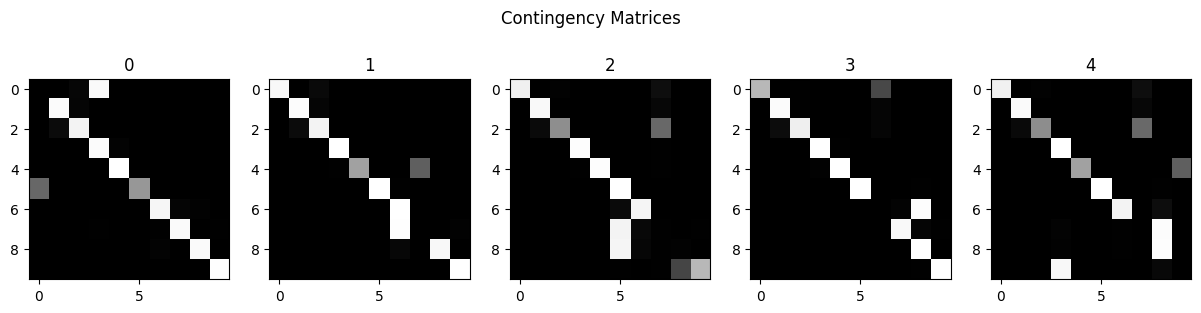

,Accuracy Score,Adj. Rand Indices
0,0.840846,0.830970
1,0.844769,0.830582
2,0.711923,0.646562
3,0.853308,0.835986
4,0.698538,0.705537


In [5]:
# d) Repeat b) and c) five times with different random initializations
num_iterations = 5
conts=[]
accuracy_scores = []
adjusted_rand_indices = []

for i in range(num_iterations):
    kmeans = KMeans(n_clusters=len(np.unique(y)), random_state=i,init='random',n_init=1)
    y_pred = kmeans.fit_predict(X)
    
    cont_matrix = contingency_matrix(y, y_pred)
    
    row_ind, col_ind = linear_sum_assignment(cont_matrix,maximize=True)
    cont_matrix_permuted = cont_matrix[:, col_ind]
    
    accuracy = np.sum(np.diag(cont_matrix_permuted)) / np.sum(cont_matrix_permuted)
    adjusted_rand = adjusted_rand_score(y, y_pred)
    
    accuracy_scores.append(accuracy)
    adjusted_rand_indices.append(adjusted_rand)
    conts.append(cont_matrix_permuted)
    
fig, axs = plt.subplots(1, len(conts),
                         figsize=(3*len(conts), 3.5))
for i in range(len(conts)):
    if len(conts) > 1:
        ax = axs[i]
        ax.title.set_text(str(i))
    else:
        ax = axs
    ax.imshow(conts[i], cmap='gray')
    ax.xaxis.get_major_locator().set_params(integer=True)
    ax.yaxis.get_major_locator().set_params(integer=True)
plt.suptitle('Contingency Matrices')
plt.show()

data = {
    'Accuracy Score' : accuracy_scores,
    'Adj. Rand Indices' : adjusted_rand_indices
    }
display(pd.DataFrame(data))


**e) Repeat point d) with five different k-means++ initializations (see the sklearn.cluster.KMeans
documentation for details). (1 point)**

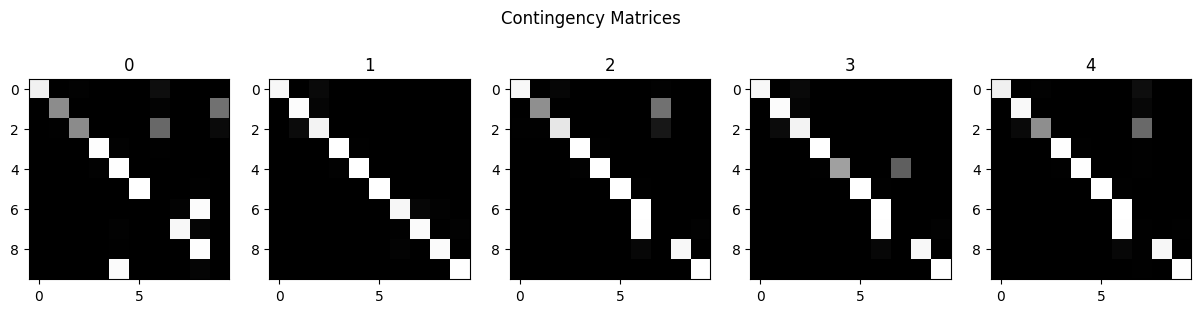

,Accuracy Score,Adj. Rand Indices
0,0.714590,0.714590
1,0.952099,0.952099
2,0.827276,0.827276
3,0.830797,0.830797
4,0.827301,0.827301


In [6]:
# e) Repeat d) with five different k-means++ initializations
num_iterations = 5
conts=[]
accuracy_scores_kpp = []
adjusted_rand_indices_kpp = []

for i in range(num_iterations):
    kmeans = KMeans(n_clusters=len(np.unique(y)), random_state=i,init='k-means++',n_init=1)
    y_pred = kmeans.fit_predict(X)
    
    cont_matrix = contingency_matrix(y, y_pred)
    
    row_ind, col_ind = linear_sum_assignment(cont_matrix,maximize=True)
    cont_matrix_permuted = cont_matrix[:, col_ind]
    
    accuracy = np.sum(np.diag(cont_matrix_permuted)) / np.sum(cont_matrix_permuted)
    adjusted_rand = adjusted_rand_score(y, y_pred)
    
    accuracy_scores_kpp.append(accuracy)
    adjusted_rand_indices_kpp.append(adjusted_rand)
    conts.append(cont_matrix_permuted)
    
fig, axs = plt.subplots(1, len(conts),
                         figsize=(3*len(conts), 3.5))
for i in range(len(conts)):
    if len(conts) > 1:
        ax = axs[i]
        ax.title.set_text(str(i))
    else:
        ax = axs
    ax.imshow(conts[i], cmap='gray')
    ax.xaxis.get_major_locator().set_params(integer=True)
    ax.yaxis.get_major_locator().set_params(integer=True)
plt.suptitle('Contingency Matrices')
plt.show()

data = {
    'Accuracy Score' : adjusted_rand_indices_kpp,
    'Adj. Rand Indices' : adjusted_rand_indices_kpp
    }
display(pd.DataFrame(data))

**f) Implement the method for selecting k centers furthest from each other from page
29 of the LearningGM slides. Repeat point d) with five different instances of this
initialization method. (2 points)**

In [7]:
def max_distance(random_state: int = None):
    
    # The initial number of centers
    I = int(10*np.log(10))
    rng = np.random.default_rng(random_state)
    # Take I samples for the candidates of centers
    samples_ind = rng.choice(X.shape[0],
                                    size = I,
                                    replace = False)
    original_samples = X[samples_ind]
    # array of centers. each row is a center
    # initialize by the first row of samples
    centers = original_samples[0].reshape(1, -1)
    # samples after we took out centers
    remaining_samp = np.delete(original_samples, 0, axis = 0)

    for _ in range(9):
        # Construct a 3D array where [i,j,:] is the difference
        # (ith sample vector) -(jth center vector)
        diff = remaining_samp[:, np.newaxis, :] - centers[np.newaxis, :, :]
        # [i,j] element is the distance between ith sample and jth center
        norm_diff = np.linalg.norm(diff, axis = -1)
        # [i,j] element is d(mu_i, S)
        min_norm_diff = np.min(norm_diff, axis = -1)
        # The index that has the largest distance to the centers
        max_ind = np.argmax(min_norm_diff)
        # add the sample with thelargest element to the centers
        centers = np.concatenate([centers, remaining_samp[max_ind].reshape(1, -1)])
        remaining_samp = np.delete(remaining_samp, max_ind, axis = 0)

    return centers

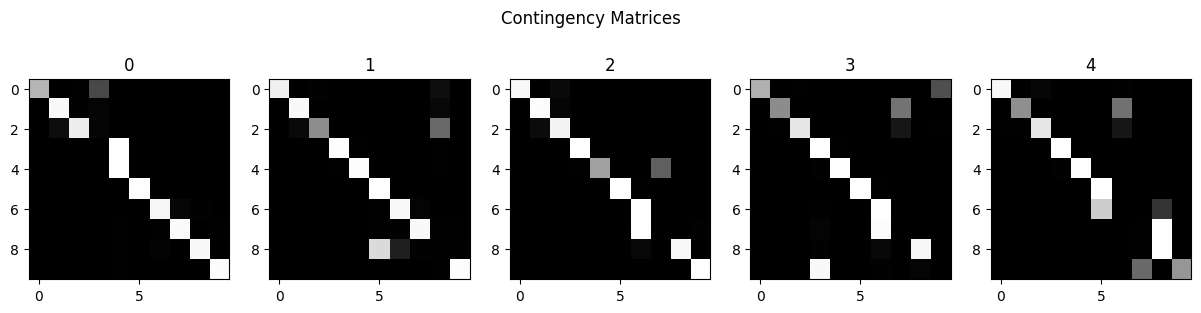

,Accuracy Score,Adj. Rand Indices
0,0.851231,0.834414
1,0.836077,0.814536
2,0.844692,0.830797
3,0.705462,0.716990
4,0.697846,0.692198


In [8]:
num_iterations = 5
conts=[]
accuracy_scores_md = []
adjusted_rand_indices_md = []

for i in range(num_iterations):
#     init_max_distance(i)
    kmeans = KMeans(n_clusters=len(np.unique(y)), random_state=i,init=max_distance(i),n_init=1)
    y_pred = kmeans.fit_predict(X)
    
    cont_matrix = contingency_matrix(y, y_pred)
    
    row_ind, col_ind = linear_sum_assignment(cont_matrix,maximize=True)
    cont_matrix_permuted = cont_matrix[:, col_ind]
    
    accuracy = np.sum(np.diag(cont_matrix_permuted)) / np.sum(cont_matrix_permuted)
    adjusted_rand = adjusted_rand_score(y, y_pred)
    
    accuracy_scores_md.append(accuracy)
    adjusted_rand_indices_md.append(adjusted_rand)
    conts.append(cont_matrix_permuted)
    
fig, axs = plt.subplots(1, len(conts),
                         figsize=(3*len(conts), 3.5))
for i in range(len(conts)):
    if len(conts) > 1:
        ax = axs[i]
        ax.title.set_text(str(i))
    else:
        ax = axs
    ax.imshow(conts[i], cmap='gray')
    ax.xaxis.get_major_locator().set_params(integer=True)
    ax.yaxis.get_major_locator().set_params(integer=True)
plt.suptitle('Contingency Matrices')
plt.show()

data = {
    'Accuracy Score' : accuracy_scores_md,
    'Adj. Rand Indices' : adjusted_rand_indices_md
    }
display(pd.DataFrame(data))

**g) Report in a table the average accuracy scores and Adjusted Rand index scores
obtained at points d), e), f), where each average is computed from the five corresponding
initializations. Which initialization method obtains the largest average
accuracy score and which obtains the largest average Adjusted Rand Index? (1
point)**

In [9]:
data = {
    'random': [sum(accuracy_scores)/5, sum(adjusted_rand_indices)/5],
    'k-means++': [sum(accuracy_scores_kpp)/5, sum(adjusted_rand_indices_kpp)/5],
    'max-distance': [sum(accuracy_scores_md)/5, sum(adjusted_rand_indices_md)/5]
}
display(pd.DataFrame(data, index = ['Average Accuracy', 'Adjusted Random Indices']))

,random,k-means++,max-distance
Average Accuracy,0.789877,0.837446,0.787062
Adjusted Random Indices,0.769927,0.830413,0.777787


**<u>K-means++ is the best among them.**